## Packages list
It's all of the packages that I ended up using in my analysis in this code

In [26]:
library(tidyverse)
library(tidyquant)
library(gridExtra)
library(grid)
library(ggplot2)
library(parsedate)
library(readr)
library(RColorBrewer)
library(jiebaR)
library(wordcloud2)
library(ggmap)
library(rvest)
library(httr)
library(RSelenium)
library(corrplot)
library(gmodels)

## Description
This report explores a dataset containing all the actual transactions occurring between 11/11/2019 00:00:00 and 11/11/2019 11:59:59 through Tmall Global Flagship store.


# Reading in the data
Load the Data

In [28]:
df <- read_csv("ndouble11_test.csv")

Parsed with column specification:
cols(
  order_date = col_character(),
  invoice_date = col_character(),
  invoice_num = col_double(),
  cust_id = col_character(),
  country = col_character(),
  SumPurchases = col_double(),
  shipping_charge = col_double(),
  quantity = col_double(),
  stock_code = col_double(),
  tax = col_double(),
  description = col_character()
)


View the row data

In [29]:
head(df)

order_date,invoice_date,invoice_num,cust_id,country,SumPurchases,shipping_charge,quantity,stock_code,tax,description
2019-11-11 0:29,2019-11-11 0:30,7.156559e+13,余春<U+67AB>,Chongqing,0.40,0,2,5.37183e+11,0.00,테크 울드라이 용기 1500ML 세탁세제
2019-11-11 0:29,2019-11-11 0:30,7.156559e+13,余春<U+67AB>,Chongqing,0.40,0,2,5.47073e+11,0.00,테크 울드라이 1300ML
2019-11-11 0:00,2019-11-11 0:00,7.156559e+13,<U+5F20>嘉<U+9759>,Yunnan,100.80,0,1,5.50601e+11,8.41,RE닥터그루트 지성두피용 샴푸 400ml+ RE닥터그루트 지성두피용 200ml 증정
2019-11-11 0:13,2019-11-11 0:13,7.156559e+13,<U+891A>慧芬,Zhejiang,12.23,0,1,5.86484e+11,2.59,염모제 스마트염색(원터치)_흑색
2019-10-31 17:51,2019-11-11 1:12,7.156560e+13,大熊<U+5B9D>殿,Guangdong,111.36,0,4,5.96291e+11,19.52,윤고 더 퍼스트 400ml+50ml(신)_기획
2019-11-11 0:02,2019-11-11 0:02,7.156560e+13,程程,Jilin,530.61,0,6,5.53141e+11,52.97,토디앙 핑크퐁 팬티 특대형 여아 36P


Rename a wrong variable 

In [30]:
df <- rename(df, "province" = "country")

Create separate features for datetime components and show its status (btw order / return) 

In [31]:
df <- 
 df %>% 
 mutate(order_hour = hour(df$invoice_date),
  order_min = minute(df$invoice_date),
  order_return = ifelse(SumPurchases >0, "order", "return"))

Drop the nulls 

In [32]:
df <- na.omit(df)

View and summarize the data

In [33]:
str(df)

Classes 'tbl_df', 'tbl' and 'data.frame':	19776 obs. of  14 variables:
 $ order_date     : chr  "2019-11-11 0:29" "2019-11-11 0:29" "2019-11-11 0:00" "2019-11-11 0:13" ...
 $ invoice_date   : chr  "2019-11-11 0:30" "2019-11-11 0:30" "2019-11-11 0:00" "2019-11-11 0:13" ...
 $ invoice_num    : num  7.16e+13 7.16e+13 7.16e+13 7.16e+13 7.16e+13 ...
 $ cust_id        : chr  "余春<U+67AB>" "余春<U+67AB>" "<U+5F20>嘉<U+9759>" "<U+891A>慧芬" ...
 $ province       : chr  "Chongqing" "Chongqing" "Yunnan" "Zhejiang" ...
 $ SumPurchases   : num  0.4 0.4 100.8 12.2 111.4 ...
 $ shipping_charge: num  0 0 0 0 0 0 0 0 0 0 ...
 $ quantity       : num  2 2 1 1 4 6 1 1 1 1 ...
 $ stock_code     : num  5.37e+11 5.47e+11 5.51e+11 5.86e+11 5.96e+11 ...
 $ tax            : num  0 0 8.41 2.59 19.52 ...
 $ description    : chr  "테크 울드라이 용기 1500ML 세탁세제" "테크 울드라이 1300ML" "RE닥터그루트 지성두피용 샴푸 400ml+ RE닥터그루트 지성두피용 200ml 증정" "염모제 스마트염색(원터치)_흑색" ...
 $ order_hour     : int  0 0 0 0 1 0 0 0 0 0 ...
 $ order_min      : int  30 

# Exploratory Data Analysis (EDA)
## 1) Transactions by country
Since province is categorical variable, now we need to plot a bar

In [39]:
df %>% 
 count(province) %>% 
 arrange(-n) %>% 
 head(10) %>% 
 print()

# A tibble: 10 x 2
   province      n
   <chr>     <int>
 1 Guangdong  2406
 2 Jiangsu    1953
 3 Zhejiang   1949
 4 Shanghai   1571
 5 Shandong   1455
 6 Beijing     850
 7 Hubei       824
 8 Henan       813
 9 Fujian      797
10 Liaoning    794


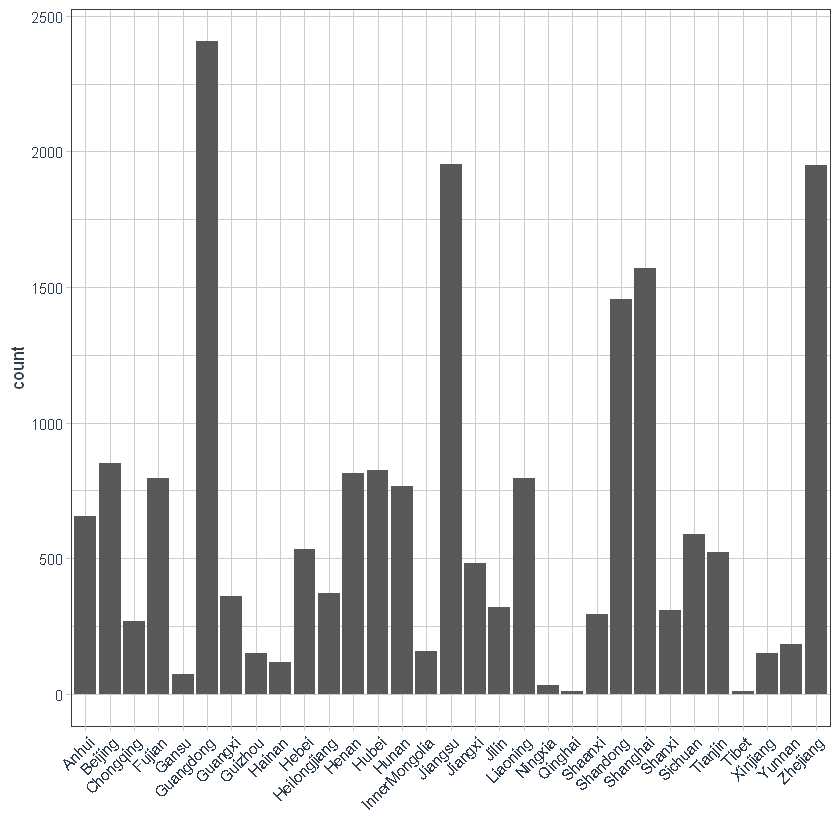

In [40]:
df %>%
 ggplot(aes(province))+ geom_bar()+
 scale_fill_manual(values = palette_light()) +
 theme_tq() +
 theme(legend.position = "right") +
 theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
 labs(x = "",
  fill = "")

now we can see that Guangdong, Jiangsu, Zhejiang, Shanghai are the top cities of having the most transactions.

Continuous variable with the distribution ; histogram

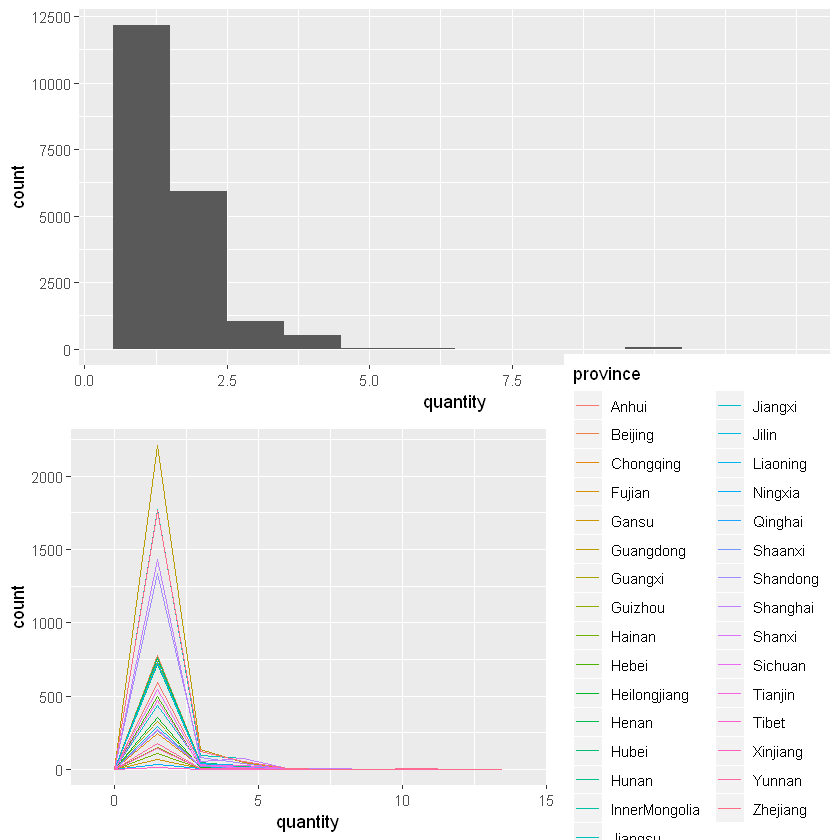

In [41]:
a <- ggplot(data = df) +
 geom_histogram(mapping = aes(x = quantity), binwidth = 1)

b <- ggplot(data = df, mapping = aes(x = quantity, colour = province)) +
 geom_freqpoly(binwidth = 1.5)

grid.arrange(a, b, ncol = 1)

In [42]:
df %>% 
 count(cut_width(quantity, 1)) %>% 
 mutate(percentage = n/sum(n)*100)

"cut_width(quantity, 1)",n,percentage
"[0.5,1.5]",12176,61.56957929
"(1.5,2.5]",5936,30.01618123
"(2.5,3.5]",1040,5.25889968
"(3.5,4.5]",518,2.61933657
"(4.5,5.5]",18,0.09101942
"(5.5,6.5]",29,0.14664239
"(7.5,8.5]",8,0.04045307
"(8.5,9.5]",2,0.01011327
"(9.5,10.5]",47,0.23766181
"(11.5,12.5]",2,0.01011327


as we can see abvoe, most of customer seem to buy just an item or two up to 91.6% 

## 2) Transactions over time
Let’s look at the income/loss from transactions over time.

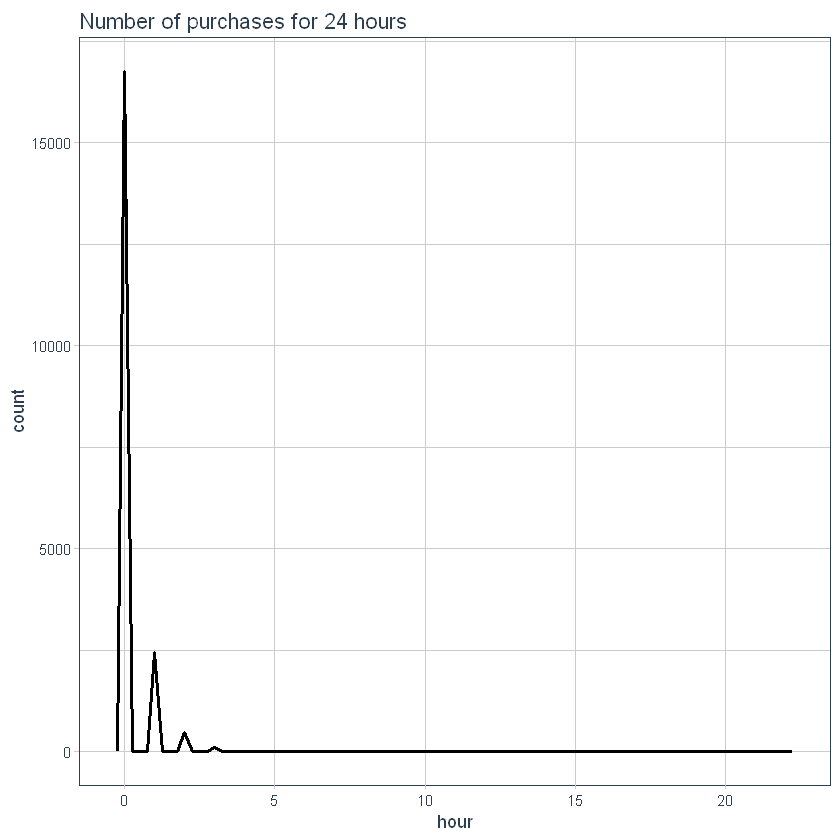

In [43]:
df %>%
 ggplot(aes(x = order_hour)) +
 geom_freqpoly(bins = 100, size = 1, binwidth = 1/4) +
 scale_color_manual(values = palette_light()) +
 theme_tq() +
 guides(color = FALSE) +
 labs(title = "Number of purchases for 24 hours",
  x = "hour")

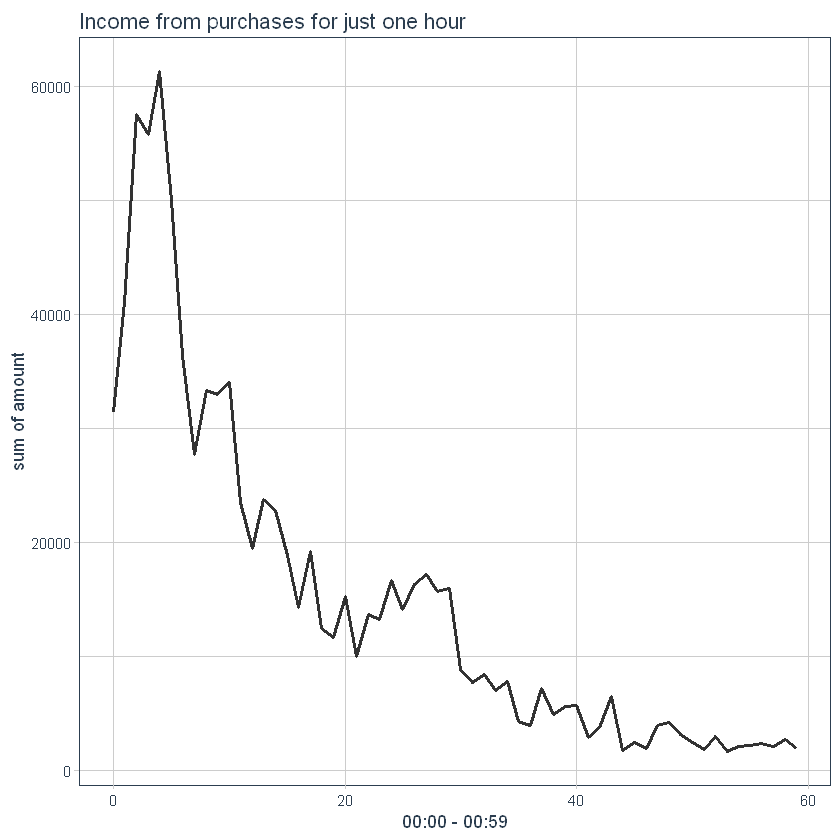

In [44]:
df %>%
 filter(order_hour==0) %>% 
 group_by(order_min) %>%
 summarise(Total_amount = sum(SumPurchases)) %>%
 ggplot(aes(x = order_min, y = Total_amount)) +
 geom_line(size = 1, alpha = 0.8) +
 scale_color_manual(values = palette_light()) +
 theme_tq() +
 guides(color = FALSE) +
 labs(title = "Income from purchases for just one hour",
  x = "00:00 - 00:59",
  y = "sum of amount",
  color = "")

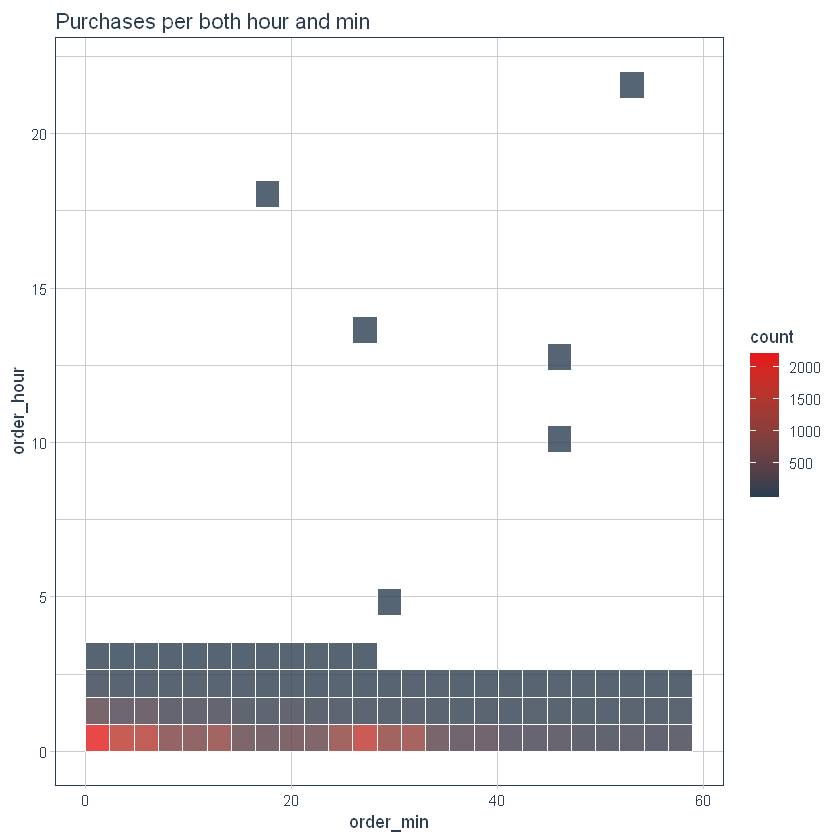

In [45]:
df %>%
 ggplot(aes(x = order_min, y = order_hour)) +
 stat_bin2d(alpha = 0.8, bins = 25, color = "white") +
 scale_fill_gradientn(colours = c(palette_light()[[1]], palette_light()[[2]])) +
 theme_tq() +
 theme(legend.position = "right") +
 labs(title = "Purchases per both hour and min")

3) Transactions over Items!
Also of interest are the items that are being purchases the most. Here, we sum up the net quantities for each item.

In [46]:
df %>% 
 group_by(stock_code, description) %>% 
 summarise(sum = sum(quantity)) %>%
 arrange(-sum) %>% 
 head(10)

stock_code,description,sum
5.96291e+11,윤고 더 퍼스트 400ml+50ml(신)_기획,5210
5.47073e+11,테크 울드라이 1300ML,3752
5.37183e+11,테크 울드라이 용기 1500ML 세탁세제,3724
5.37297e+11,페리오 토탈 7 마일드 120g,2256
5.40352e+11,FiJi시트세제 30매*2,1897
5.98468e+11,온)보타니크 바디워시 레몬&노니 500mL,1185
5.42578e+11,죽염 잇몸고 펌프 치약 285g*2+V죽염 칫솔 잇몸전문 2+1입_베,999
5.50601e+11,RE닥터그루트 지성두피용 샴푸 400ml+ RE닥터그루트 지성두피용 200ml 증정,844
5.86269e+11,염모제 스마트염색(원터치)_자연갈색,500
5.72042e+11,죽염 히말라야 플로럴민트 100g,472


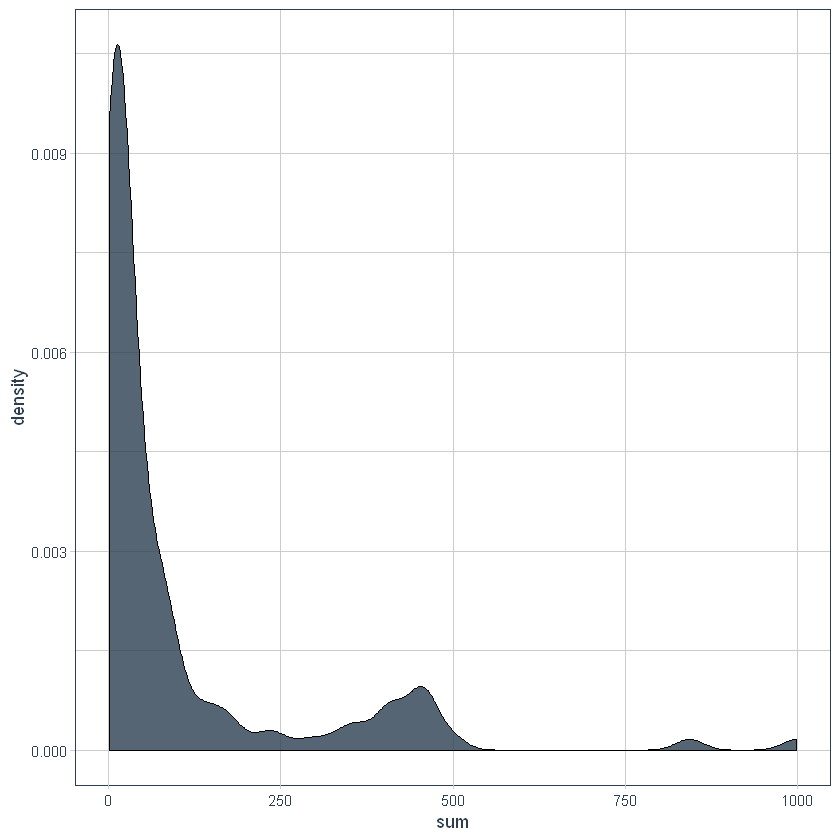

In [47]:
df %>%
 group_by(stock_code, description) %>% 
 summarise(sum = sum(quantity)) %>% 
 filter(sum>0 & sum<1000) %>%
 ggplot(aes(x = sum)) +
 geom_density(fill = palette_light()[[1]], alpha = 0.8) +
 theme_tq()

As we can see in the plots below, the majority of items is purchases only occasionally, while a few items are purchased a lot.
I'd likt to take a quick look at Yungo and Tech how it went for the first one hour, since it seems to be sold the most 

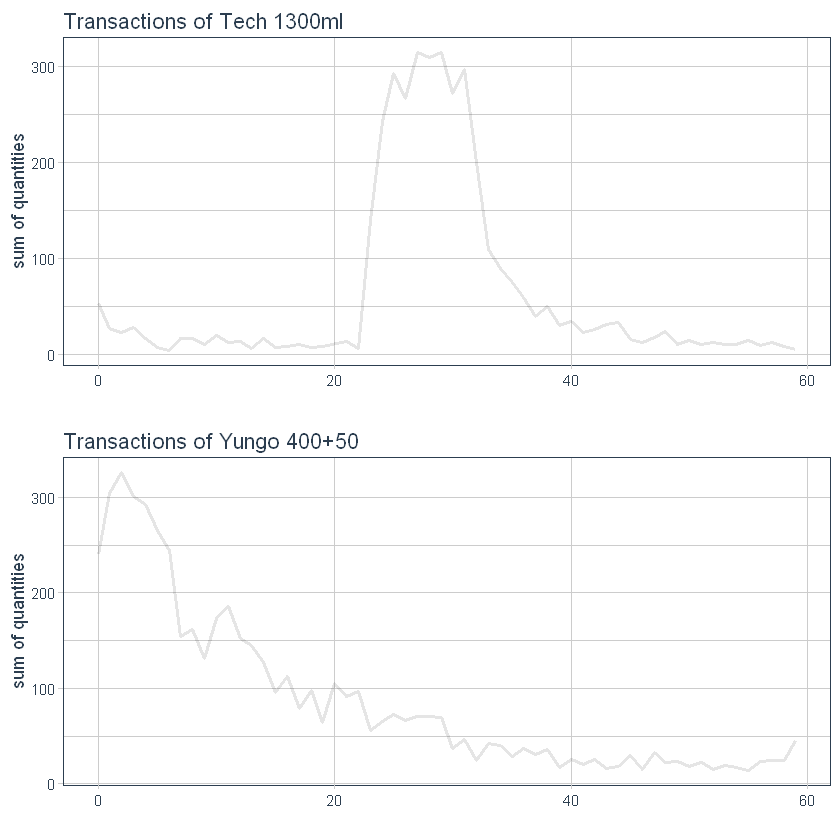

In [48]:
tech <- df %>%
 filter(stock_code == 547073000000) %>%
 group_by(order_min) %>%
 summarise(sum = sum(quantity)) %>%
 ggplot(aes(x = order_min, y = sum)) +
 geom_line(size = 1, alpha = 0.1) +
 scale_color_manual(values = palette_light()) +
 theme_tq() +
 labs(x = "",
  y = "sum of quantities",
  color = "",
  title = "Transactions of Tech 1300ml")


yungo <- df %>%
 filter(stock_code == 596291000000) %>%
 group_by(order_min) %>%
 summarise(sum = sum(quantity)) %>%
 ggplot(aes(x = order_min, y = sum)) +
 geom_line(size = 1, alpha = 0.1) +
 scale_color_manual(values = palette_light()) +
 theme_tq() +
 labs(x = "",
  y = "sum of quantities",
  color = "",
  title = "Transactions of Yungo 400+50")

grid.arrange(tech, yungo, ncol = 1)

## Crawling = Scraping
I tried 3 times, failed twice and the last try worked eventually.
I scraped a list of reviews of the brand-new item called 'on the body botanique body wash', which I just got it released, 
so I wanted to see what people are talking about it after they actually used it

(1) Rvest package 

In [52]:
url <- 'https://detail.tmall.hk/item.htm?spm=a220m.1000858.1000725.1.6ad6297cof43fi&id=600052650795&skuId=4188286968549&user_id=2549234913&cat_id=52792006&is_b=1&rn=240fefacc0ab303bf5c7f9b55ef15623'

doc <- read_html(url)
 html_nodes('.tm-rate-fulltxt') %>% 
 html_text()

ERROR: Error in UseMethod("xml_find_all"): 클래스 "character"의 객체에 적용된 'xml_find_all'에 사용할수 있는 메소드가 없습니다


(2) Phantomjs package

In [53]:
writeLines(sprintf("var page = require('webpage').create();
page.open('%s', function () {
  console.log(page.content); //page source
  phantom.exit();
  });", url), con="scrape.js")
 
 system("phantomjs scrape.js > scrape.html")
 
 page_html <- html("scrape.html")
 page_html %>% html_nodes('class') %>% html_table()
page_html

Warning message in system("phantomjs scrape.js > scrape.html"):
"'phantomjs' not found"

[1] 127

Warning message:
"'html' is deprecated.
Use 'xml2::read_html' instead.
See help("Deprecated")"

ERROR: Error: 'scrape.html' does not exist in current working directory ('C:/Users/seung/OneDrive/R/Rstudy_Dangsan/R1129').


(3) rselenium 

In [131]:
url <- 'https://www.amazon.cn/dp/B01N5HLNB8/ref=zg_bs_beauty_1?_encoding=UTF8&psc=1&refRID=2FZYJF2Q7XT4W3NETHB1'
remDr <- remoteDriver(port=4445L, browserName="chrome") 
remDr$open() 
remDr$navigate(url)

[1] "Connecting to remote server"
$acceptInsecureCerts
[1] FALSE

$browserName
[1] "chrome"

$browserVersion
[1] "78.0.3904.108"

$chrome
$chrome$chromedriverVersion
[1] "78.0.3904.105 (60e2d8774a8151efa6a00b1f358371b1e0e07ee2-refs/branch-heads/3904@{#877})"

$chrome$userDataDir
[1] "C:\\Users\\seung\\AppData\\Local\\Temp\\scoped_dir14728_2021995576"


$`goog:chromeOptions`
$`goog:chromeOptions`$debuggerAddress
[1] "localhost:63475"


$networkConnectionEnabled
[1] FALSE

$pageLoadStrategy
[1] "normal"

$platformName
[1] "windows nt"

$proxy
named list()

$setWindowRect
[1] TRUE

$strictFileInteractability
[1] FALSE

$timeouts
$timeouts$implicit
[1] 0

$timeouts$pageLoad
[1] 300000

$timeouts$script
[1] 30000


$unhandledPromptBehavior
[1] "dismiss and notify"

$webdriver.remote.sessionid
[1] "8aab471252ac135c45c0341f5d0dc465"

$id
[1] "8aab471252ac135c45c0341f5d0dc465"



In [132]:
html <- remDr$getPageSource()[[1]]
html <- read_html(html)

In [137]:
review <- html %>% 
 html_nodes(xpath='//*[@id="customer_review-R1WIP8LTA698M8"]/div[4]/span/div/div[1]/span') %>% 
 html_text() 
review <- gsub("\\.", "", review)
review <- gsub("\\d+", "", review)
review <- gsub("\n", "", review)
review

[1] "第一次<U+4E70>雅<U+987F>小<U+80F6>囊，首先<U+74F6>壁上油乎乎的，初步<U+65AD>定有<U+574F>的，果然<U+627E>到一<U+4E2A>裂<U+5F00>的，然后<U+6570>量是<U+4E2A>，包含一<U+4E2A><U+574F>的，一<U+4E2A><U+6CA1>有<U+8FB9>的，<U+74F6>口<U+6CA1>有封<U+88C5>，感<U+89C9><U+5F88><U+968F>意，再次，<U+8BF4>明<U+4E66>上的<U+4EA7>品名<U+79F0><U+8DDF>盒子<U+5BF9>不上，最后又<U+53D1><U+73B0>一<U+4E2A>有裂口的，一按就出油，<U+8FD9><U+4E48>不<U+4E25><U+8C28>的化<U+5986>品<U+641E>得我都不敢用了，<U+96BE>道我要用<U+6765>抹手<U+5417>？保<U+8D28>期也不知道什<U+4E48><U+65F6>候"

In [ ]:
seg <- qseg[review]
seg <- seg[nchar(seg)>1]
seg <- table(seg)
seg <- sort(seg, decreasing = TRUE)
seg<-data.frame(seg)
seg

In [ ]:
wordcloud(seg$seg , seg$Freq, colors = rainbow(100), random.order=F)

# ANOVA 
분산분석은 그룹간의 (평균)비교를 할때 사용하는 통계적 방법론 ; 
## Province와 고객 객단가의 상관관계 
p-value: < 2.2e-16 임으로 유의미한 관계가 있다고 볼 수 있음

In [84]:
anova_dt <- lm(SumPurchases ~ province, data = df)
summary(anova_dt)


Call:
lm(formula = SumPurchases ~ province, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
 -86.67  -40.78  -13.43   19.36 1341.70 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)             49.249      2.586  19.044  < 2e-16 ***
provinceBeijing         28.743      3.443   8.347  < 2e-16 ***
provinceChongqing        3.863      4.811   0.803 0.421980    
provinceFujian          15.610      3.493   4.469 7.90e-06 ***
provinceGansu           42.059      8.178   5.143 2.73e-07 ***
provinceGuangdong        5.308      2.918   1.819 0.068935 .  
provinceGuangxi          1.197      4.347   0.275 0.782944    
provinceGuizhou          1.759      5.966   0.295 0.768100    
provinceHainan          20.111      6.652   3.023 0.002502 ** 
provinceHebei            1.173      3.862   0.304 0.761362    
provinceHeilongjiang    13.784      4.301   3.205 0.001354 ** 
provinceHenan           -3.651      3.477  -1.050 0.293774    
provinceHubei   

lm( )을 통해 모델을 만들고 나면 새로운 데이터에 대한 예측값은 predict( )로 구할 수 있다.회귀 계수(절편과 기울기)의 신뢰 구간을 고려하기 위해 type=“confidence”를 지정하면 제동 거리의 평균 신뢰 구간을 구할 수 있다. 다음 결과에서 fit은 예측값의 점 추정치, lwr과 upr은 각각 신뢰 구간의 하한과 상한 값을 의미한다.

길림성 68.9원
광동성 54.6원
베이징 78.0원

각 성도별 상기와 같은 매출 값을 예상해 볼 수 있다

In [86]:
predict(anova_dt, newdata = data.frame(province = "Jilin"),interval="confidence")
predict(anova_dt, newdata = data.frame(province = "Guangdong"),interval="confidence")
predict(anova_dt, newdata = data.frame(province = "Beijing"),interval="confidence")

fit,lwr,upr
68.86523,61.61329,76.11717


fit,lwr,upr
54.55674,51.90788,57.2056


fit,lwr,upr
77.99198,73.53544,82.44851


## Province와 tax의 상관관계 
p-value: < 2.2e-16 유의미한 상관관계라고 볼 수 있다

In [89]:
anova_dt2 <- lm(tax ~ province, data = df)
summary(anova_dt2)


Call:
lm(formula = tax ~ province, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.500  -4.417  -1.711   2.557 128.981 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)             7.1059     0.2854  24.895  < 2e-16 ***
provinceBeijing         2.4440     0.3801   6.431 1.30e-10 ***
provinceChongqing       0.4911     0.5310   0.925 0.355066    
provinceFujian          1.6434     0.3855   4.263 2.03e-05 ***
provinceGansu           3.1737     0.9026   3.516 0.000439 ***
provinceGuangdong       0.3332     0.3221   1.035 0.300824    
provinceGuangxi        -0.0873     0.4797  -0.182 0.855599    
provinceGuizhou         0.1539     0.6585   0.234 0.815236    
provinceHainan          1.7813     0.7341   2.426 0.015258 *  
provinceHebei           0.2495     0.4263   0.585 0.558324    
provinceHeilongjiang    0.7888     0.4747   1.662 0.096621 .  
provinceHenan          -0.2087     0.3838  -0.544 0.586543    
provinceHubei           0

사천성 8.02원
베이징 9.55원
광동성 7.44원

In [91]:
predict(anova_dt2, newdata = data.frame(province = "Sichuan"),interval="confidence")
predict(anova_dt2, newdata = data.frame(province = "Beijing"),interval="confidence")
predict(anova_dt2, newdata = data.frame(province = "Guangdong"),interval="confidence")

fit,lwr,upr
8.022598,7.431716,8.613479


fit,lwr,upr
9.549847,9.057979,10.04172


fit,lwr,upr
7.439086,7.146731,7.73144
